# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pdb;

# Understanding the Data

## Importing the Data

In [2]:
Sales_Data = pd.read_csv('Data/Groceries_dataset.csv')
Sales_Data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
Sales_Data.shape

(38765, 3)

## Ploting the Data (Top 20 and bottom of number of item sold)

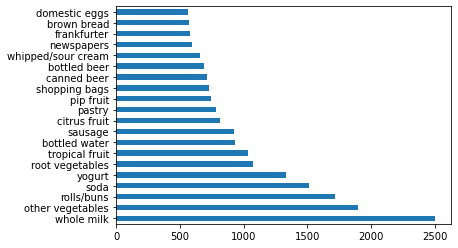

In [4]:
Sales_Data['itemDescription'].value_counts()[:20].plot(kind='barh')

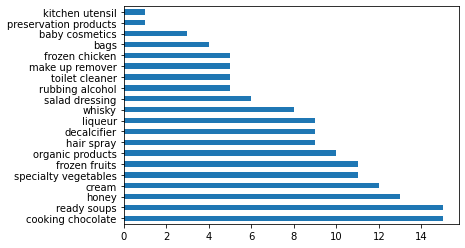

In [5]:
Sales_Data['itemDescription'].value_counts()[-20:].plot(kind='barh')

## Cleaning the Data
The data appers to be cleaned before this analysiz. No Null or N/A values. Duplicated values are allowed in the nature of the data (One customer can shop more than one sausage one one day for example). But since we are only interested in correlation between products (and not quantity) we will drop the duplicated values.

### Checking for Null, N/A and duplicates

In [6]:
print("Total N/A values: " ,Sales_Data.isna().sum().sum())

Total N/A values:  0


In [7]:
print("Total null values: ",Sales_Data.isnull().sum().sum())

Total null values:  0


In [8]:
Duplicated_rows = Sales_Data[Sales_Data.duplicated(keep=False)]
print("Number of duplicated rows: ", Duplicated_rows.shape)

Number of duplicated rows:  (1491, 3)


In [9]:
Duplicated_rows.sort_values(by=['Date', 'Member_number', 'itemDescription']).head()

,Member_number,Date,itemDescription
3677,1235,01-01-2015,sausage
8648,1235,01-01-2015,sausage
15721,2763,01-02-2015,yogurt
19957,2763,01-02-2015,yogurt
8544,2944,01-02-2015,yogurt


In [10]:
# Drop duplicated values
Sales_Data = Sales_Data.drop_duplicates()
Sales_Data.shape

(38006, 3)

# Future building and One-Hot encoding 

## Creating a invoice-number 

In [11]:
Sales_Data['Invoice_Nr'] = Sales_Data.apply (lambda row: str(row.Member_number) + row.Date , axis=1)
Sales_Data = Sales_Data[['Invoice_Nr', 'Member_number', 'Date', 'itemDescription']]
Sales_Data = Sales_Data.drop(['Member_number','Date'], axis=1)
Sales_Data.sort_values(by='Invoice_Nr')

,Invoice_Nr,itemDescription
20992,100015-03-2015,semi-finished bread
8395,100015-03-2015,whole milk
24544,100015-03-2015,yogurt
4843,100015-03-2015,sausage
29480,100024-06-2014,pastry
...,...,...
3578,500010-02-2015,soda
34885,500010-02-2015,semi-finished bread
19727,500010-02-2015,root vegetables
9340,500016-11-2014,bottled beer


## Plottning number of items per invocenumber

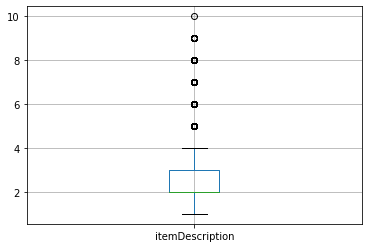

In [12]:
Sales_Data.groupby(['Invoice_Nr']).count().boxplot()


## One-Hot Encoding & Transactions

### One-Hot Encoding

In [13]:
#Sales_Data_Enc = pd.concat([Sales_Data['Invoice_Nr'],pd.get_dummies(Sales_Data['itemDescription'])],axis=1)
#Sales_Data_Enc = Sales_Data_Enc.drop(['Invoice_Nr'],axis=1)

Sales_Data_Enc =Sales_Data[['Invoice_Nr']].join(pd.get_dummies(Sales_Data['itemDescription'])).groupby('Invoice_Nr').max().fillna(0)
Sales_Data_Enc.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Invoice_Nr,,,,,,,,,,,,,,,,,,,,,
100015-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
100024-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100024-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100025-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100027-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Sales_Data_Enc.shape

(14963, 167)

# Analyzis - Apriori Algorithm

## Removing transactions that only have one item sold per invcoier
The recodrd that only have one item sold would not say anything about the relation between two products.

In [15]:
Sales_Data_Enc = Sales_Data_Enc[(Sales_Data_Enc >0).sum(axis =1) >= 2]
Sales_Data_Enc.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Invoice_Nr,,,,,,,,,,,,,,,,,,,,,
100015-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
100024-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100024-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100025-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100027-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
frequent_itemsets = apriori(Sales_Data_Enc, min_support=0.001, use_colnames=True)
frequent_itemsets['lenght'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by='lenght')

,support,itemsets,lenght
0,0.004066,(Instant food products),1
96,0.009080,(pickled vegetables),1
97,0.049668,(pip fruit),1
98,0.003252,(popcorn),1
99,0.037471,(pork),1
...,...,...,...
743,0.001152,"(soda, whole milk, other vegetables)",3
742,0.001220,"(whole milk, other vegetables, rolls/buns)",3
741,0.001152,"(soda, other vegetables, rolls/buns)",3
744,0.001152,"(whole milk, other vegetables, yogurt)",3


In [17]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060984,0.021615,0.001084,0.017778,0.822459,-0.000234,0.996093
1,(UHT-milk),(bottled water),0.021615,0.060984,0.001084,0.050157,0.822459,-0.000234,0.988601
2,(other vegetables),(UHT-milk),0.122510,0.021615,0.002168,0.017699,0.818820,-0.000480,0.996013
3,(UHT-milk),(other vegetables),0.021615,0.122510,0.002168,0.100313,0.818820,-0.000480,0.975329
4,(rolls/buns),(UHT-milk),0.109906,0.021615,0.001830,0.016646,0.770105,-0.000546,0.994947


In [18]:
rules.shape

(1238, 9)

## Visualizing Rules from Algorithm